In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

# load data
with open("iris_train.data", 'r') as raw_training_data:
    processed_training_data = [[float(x) for x in str.split(raw_datum, ",")] for raw_datum in raw_training_data]
    processed_training_data = [(datapoint[0:-2], datapoint[-1]) for datapoint in processed_training_data]

with open("iris_test.data", 'r') as raw_test_data:
    processed_test_data = [[float(x) for x in str.split(raw_datum, ",")] for raw_datum in raw_test_data]
    processed_test_data = [(datapoint[0:-2], datapoint[-1]) for datapoint in processed_test_data]

In [8]:
# Core algorithm implementation courtesy of Joel Grus:
# https://github.com/joelgrus/data-science-from-scratch/blob/master/code/nearest_neighbors.py

from collections import Counter
import math

def distance(vec1, vec2):
    """assumes that vectors are equal dimension and numerical"""
    squareDifference = [(v2 - v1)**2 for (v1, v2) in zip(vec1, vec2)]
    return math.sqrt(reduce(lambda x, y: x+y, squareDifference))

def majority_vote(labels):
    """assumes that labels are ordered from nearest to farthest"""
    vote_counts = Counter(labels)
    winner, winner_count = vote_counts.most_common(1)[0]
    num_winners = len([count 
                       for count in vote_counts.values()
                       if count == winner_count])

    if num_winners == 1:
        return winner                     # unique winner, so return it
    else:
        return majority_vote(labels[:-1]) # try again without the farthest

def knn_classify(k, labeled_points, new_point):
    """each labeled point should be a pair (point, label)"""
    
    # order the labeled points from nearest to farthest
    by_distance = sorted(labeled_points,
                         key=lambda (point, _): distance(point, new_point))

    # find the labels for the k closest
    k_nearest_labels = [label for _, label in by_distance[:k]]

    # and let them vote
    return majority_vote(k_nearest_labels)

In [10]:
def run_test(test_data_entry, k=1):
    predicted_label = knn_classify(k, processed_training_data, test_data_entry[0])
    given_label = test_data_entry[1]
    return (1 if given_label == predicted_label else 0, predicted_label, given_label);

full_test_results = [run_test(datum) for datum in processed_test_data]
test_results = [result[0] for result in full_test_results]
accuracy = float(sum(test_results)) / len(test_results)
print """Accuracy = %0.2f"""%(accuracy)

Accuracy = 1.00


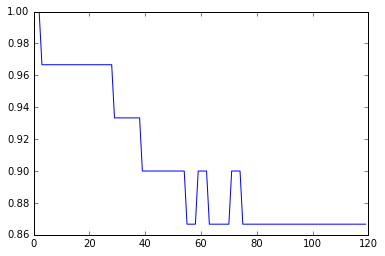

In [14]:
K_RANGE = range(1, 120)
accuracy_for_k = range(0, len(K_RANGE)) # Only as placeholder
for idx, k in enumerate(K_RANGE):
    test_results = [run_test(datum, k)[0] for datum in processed_test_data]
    accuracy_for_k[idx] = float(sum(test_results)) / len(test_results)
    
plt.plot(K_RANGE, accuracy_for_k)